<a href="https://colab.research.google.com/github/cerenonol/Calisan-Isten-Ayrilma-Tahmini-Random-Forest-ve-Karmasiklik-Matrisi-ile-Degerlendirme/blob/main/Random_Forest_ve_Karma%C5%9F%C4%B1kl%C4%B1k_Matrisi_%C3%87al%C4%B1%C5%9Fan_%C4%B0%C5%9Ften_Ayr%C4%B1lma_Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import pandas as pd
import zipfile
import os
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Zip dosyasını yükleme
uploaded = files.upload()  # Burada zip dosyasını Colab'a yükleyebilirsiniz

# 2. Zip dosyasını çıkarma
zip_file_path = 'archive.zip'  # Yüklenen zip dosyasının adı (veya doğru ad)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')  # Çıkartılacak dosyalar burada

# 3. Çıkartılan dosyaları kontrol etme
extracted_files = os.listdir('extracted_files')
print(extracted_files)  # Çıkartılan dosyaların listesini yazdırma

# 4. CSV dosyasını yükleme
csv_file_path = 'extracted_files/HR-Employee-Attrition.csv'  # Dosya adı doğru şekilde yazılmalıdır
data = pd.read_csv(csv_file_path)

# 5. Veriyi inceleme
print(data.head())

# 6. Eksik verileri kontrol etme
print(data.isnull().sum())  # Eksik veriler varsa burada görünecektir

# 7. Eksik verileri temizleme (opsiyonel)
data = data.dropna()  # Eksik verileri içeren satırları kaldırma

# 8. Kategorik verileri sayısal verilere dönüştürme (Label Encoding)
le = LabelEncoder()

# Kategorik sütunları sayısal verilere dönüştürme
categorical_columns = data.select_dtypes(include=['object']).columns  # Tüm object tipi sütunları seçeriz
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

# 9. Özellikler (X) ve hedef (y) değişkenlerini belirleme
X = data.drop('Attrition', axis=1)  # 'Attrition' hedef değişkenini çıkarıyoruz
y = data['Attrition']  # Hedef değişkeni belirliyoruz

# 10. Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 11. Random Forest modelini oluşturma ve eğitme
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 12. Model ile tahmin yapma
y_pred = model.predict(X_test)

# 13. Modeli değerlendirme
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Saving archive.zip to archive (4).zip
['HR-Employee-Attrition.csv']
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...

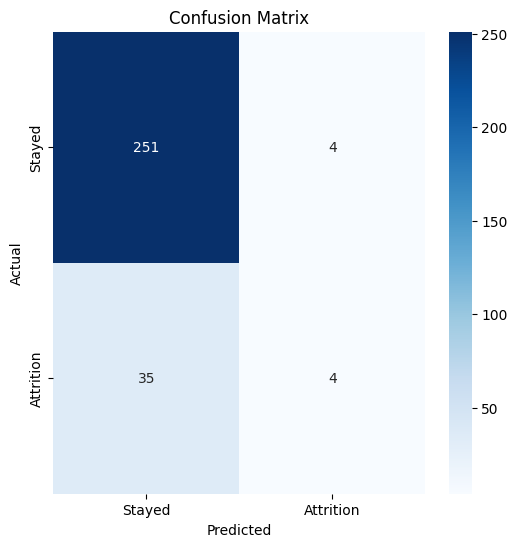

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Confusion Matrix hesaplama
cm = confusion_matrix(y_test, y_pred)

# 2. Confusion Matrix görselleştirme
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Attrition'], yticklabels=['Stayed', 'Attrition'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


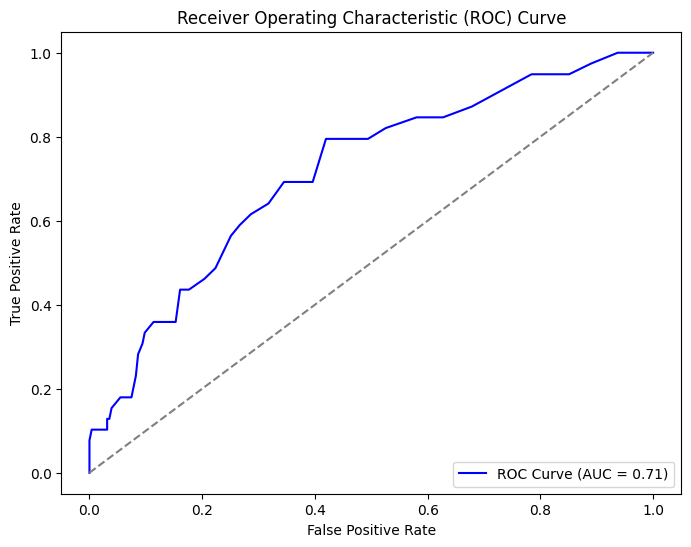

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. ROC eğrisini hesaplama
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# 2. ROC eğrisini görselleştirme
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


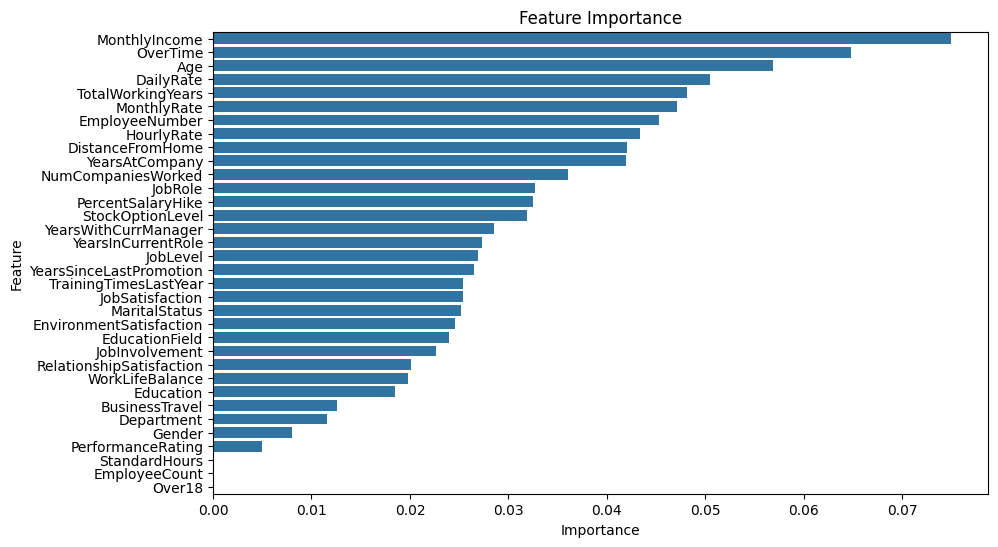

In [15]:
# 1. Özelliklerin önemini alma
importances = model.feature_importances_

# 2. Özellikler ve önemlerinin DataFrame'e dönüştürülmesi
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# 3. Özelliklerin önemine göre sıralama
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Özelliklerin önemini görselleştirme
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()
